In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
mpl.style.use('ggplot')

Чтение данных
-------

In [9]:
customers_df = pd.read_csv('olist_customers_dataset.csv')
print(customers_df.shape)
customers_df.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


customer_id — позаказный идентификатор пользователя
customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
customer_zip_code_prefix —  почтовый индекс пользователя
customer_city —  город доставки пользователя
customer_state —  штат доставки пользователя


In [13]:
f'Число штатов доставки - {customers_df.customer_state.nunique()}'

'Число штатов доставки - 27'

In [14]:
f'Число городов доставки - {customers_df.customer_city.nunique()}'

'Число городов доставки - 4119'

In [15]:
f'Число почтовых индексов - {customers_df.customer_zip_code_prefix.nunique()}'

'Число почтовых индексов - 14994'

In [19]:
customers_df.groupby('customer_city', as_index=False)\
            .agg({'customer_zip_code_prefix': 'count'})\
            .sort_values('customer_zip_code_prefix', ascending=False).head(10)

,customer_city,customer_zip_code_prefix
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
707,campinas,1444
2964,porto alegre,1379
3247,salvador,1245
1529,guarulhos,1189
3428,sao bernardo do campo,938


ТОП самых больших городов, судя по количеству почтовых индексов внутри городов.

In [20]:
orders_df = pd.read_csv('olist_order_items_dataset.csv')
print(orders_df.shape)
orders_df.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


order_id —  уникальный идентификатор заказа (номер чека)
order_item_id —  идентификатор товара внутри одного заказа
product_id —  ид товара (аналог штрихкода)
seller_id — ид производителя товара
shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
price —  цена за единицу товара
freight_value —  вес товара

In [23]:
f'Число селлеров - {orders_df.seller_id.nunique()}'

'Число селлеров - 3095'

In [24]:
f'Число заказов - {orders_df.order_id.nunique()}'

'Число заказов - 98666'

In [25]:
orders_core_df = pd.read_csv('olist_orders_dataset (2).csv')
print(orders_core_df.shape)
orders_core_df.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


order_id —  уникальный идентификатор заказа (номер чека)
customer_id —  позаказный идентификатор пользователя
order_status —  статус заказа
order_purchase_timestamp —  время создания заказа
order_approved_at —  время подтверждения оплаты заказа
order_delivered_carrier_date —  время передачи заказа в логистическую службу
order_delivered_customer_date —  время доставки заказа
order_estimated_delivery_date —  обещанная дата доставки


In [26]:
orders_core_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

•	created —  создан
•	approved —  подтверждён
•	invoiced —  выставлен счёт
•	processing —  в процессе сборки заказа
•	shipped —  отгружен со склада
•	delivered —  доставлен пользователю
•	unavailable —  недоступен
•	canceled —  отменён



1)Определим количество пользователей, которые совершили покупку только один раз. 
---
Совершенной покупкой будем считать pos_status = ['processing', 'shipped', 'delivered']


In [28]:
pos_status = ['processing', 'shipped', 'delivered']

created - заказ создан, но не обязательно оплачен.

approved - подтверждён, но может не перейти в оплату.

invoiced - счёт выставлен, но не гарантирует оплату (пользователь может не оплатить).

unavailable - товар недоступен, заказ не выполнен.

canceled - заказ отменён, покупка не состоялась.

In [33]:
pos_orders = orders_core_df.query(f'order_status in {pos_status}')
print(pos_orders.shape)

(97886, 8)


In [37]:
f'Количество пользователей, которые совершили покупку только один раз - {pos_orders.merge(customers_df, on='customer_id', how='left').customer_unique_id.nunique()}'
              

'Количество пользователей, которые совершили покупку только один раз - 94686'

2)Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)
----

In [66]:
negtive_orders = orders_core_df.query(f'order_status not in {pos_status}')
print(negtive_orders.shape)

(1555, 8)


In [67]:
negtive_orders.order_status.value_counts()

order_status
canceled       625
unavailable    609
invoiced       314
created          5
approved         2
Name: count, dtype: int64

In [68]:
negtive_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1555 entries, 6 to 99415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       1555 non-null   object
 1   customer_id                    1555 non-null   object
 2   order_status                   1555 non-null   object
 3   order_purchase_timestamp       1555 non-null   object
 4   order_approved_at              1409 non-null   object
 5   order_delivered_carrier_date   75 non-null     object
 6   order_delivered_customer_date  6 non-null      object
 7   order_estimated_delivery_date  1555 non-null   object
dtypes: object(8)
memory usage: 109.3+ KB


In [69]:
negtive_orders.loc[:, 'order_purchase_timestamp'] = pd.to_datetime(negtive_orders['order_purchase_timestamp'])

In [70]:
negtive_orders['order_purchase_timestamp'].isna().sum()

np.int64(0)

In [80]:
negative_by_months = negtive_orders.resample('MS', on='order_purchase_timestamp')['customer_id'].count()


c:\Users\tsyto\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


Text(0.5, 0, '')

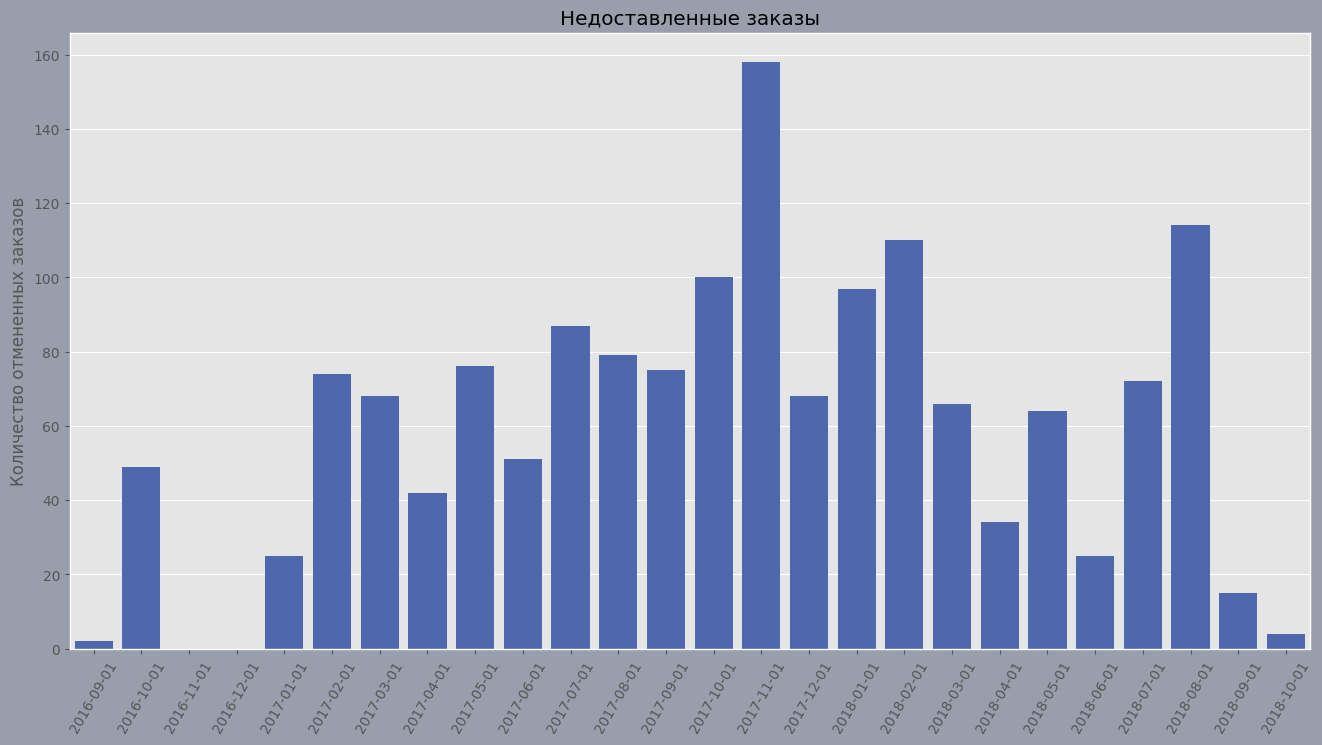

In [79]:
plt.figure(figsize=(16, 8), facecolor="#999EAC") 
sns.barplot(negative_by_months, color="#3F60BC")
plt.title('Недоставленные заказы')
plt.xticks(rotation=60)
plt.ylabel('Количество отмененных заказов', fontsize=12) 
plt.xlabel('') 

In [82]:
f'Среднее число недоставленных заказов - {negative_by_months.mean().round()}'

'Среднее число недоставленных заказов - 60.0'

In [93]:
monthly = negtive_orders.groupby([
    pd.Grouper(key='order_purchase_timestamp', freq='MS'),
    'order_status'
])['customer_id'].count().unstack(fill_value=0)
monthly

c:\Users\tsyto\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


order_status,approved,canceled,created,invoiced,unavailable
order_purchase_timestamp,,,,,
2016-09-01,0,2,0,0,0
2016-10-01,0,24,0,18,7
2017-01-01,0,3,0,12,10
2017-02-01,1,17,0,11,45
2017-03-01,0,33,0,3,32
2017-04-01,1,18,0,14,9
2017-05-01,0,29,0,16,31
2017-06-01,0,16,0,11,24
2017-07-01,0,28,0,7,52


Text(0.5, 0, '')

<Figure size 640x480 with 0 Axes>

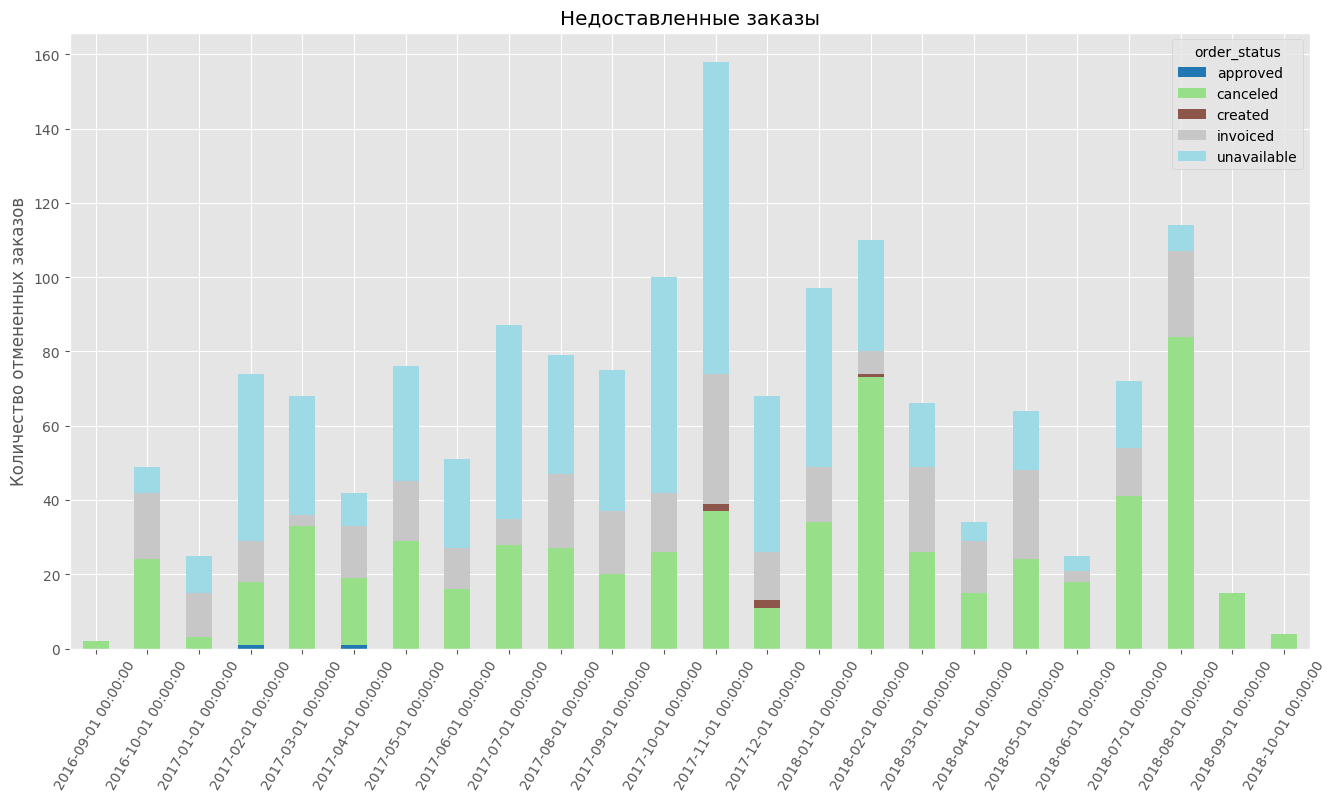

In [ ]:
plt.figure(facecolor="#999EAC") 
monthly.plot(kind='bar', stacked=True, colormap='tab20', figsize=(16, 8))
plt.title('Недоставленные заказы по статусам и месяцам')
plt.xticks(rotation=60)
plt.ylabel('Количество отмененных заказов', fontsize=12) 
plt.xlabel('') 

3)По каждому товару определить, в какой день недели товар чаще всего покупается.
----

In [97]:
orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [98]:
orders_core_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
